# Descriptive aggregated statistics based on County (Fylke)

## Quarterly aggregate

#### Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# import the separate aggregate files into differen data frames, set time index, rename columns
counties = ['Oslo County', 'Viken', 'Vestland', 'Nordland', 'Trøndelag', 'Innlandet',
 'Vestfold og Telemark', 'Møre og Romsdal', 'Agder', 'Rogaland',
 'Troms og Finnmark',]
dfs = {}
for c in counties:
    file_path = '../datasets/county-aggregated/' + c.replace(' ', '_') + '_quarter_aggr.csv' 
    df = pd.read_csv(file_path)
    df.Tid = pd.to_datetime(df.Tid)
    df.index= df.Tid
    df.rename(columns = {"('quantile_down', 0.75)": "quant_down_0.75", 
                         "('quantile_down', 0.25)": "quant_down_0.25", 
                         "('quantile_up', 0.75)": "quant_up_0.75",
                         "('quantile_up', 0.25)": "quant_up_0.25",
                         "('quantile_delay', 0.75)": "quant_delay_0.75",
                         "('quantile_delay', 0.25)": "quant_delay_0.25"}, inplace =True)
    dfs[c] = df
dfs[counties[0]].info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 36 entries, 2012-03-31 to 2020-12-31
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tid               36 non-null     datetime64[ns]
 1   median_down       36 non-null     float64       
 2   median_up         36 non-null     float64       
 3   median_delay      36 non-null     float64       
 4   mean_down         36 non-null     float64       
 5   mean_up           36 non-null     float64       
 6   mean_delay        36 non-null     float64       
 7   skew_down         36 non-null     float64       
 8   skew_up           36 non-null     float64       
 9   skew_delay        36 non-null     float64       
 10  quant_down_0.25   36 non-null     float64       
 11  quant_down_0.75   36 non-null     float64       
 12  quant_up_0.25     36 non-null     float64       
 13  quant_up_0.75     36 non-null     float64       
 14  quant_de

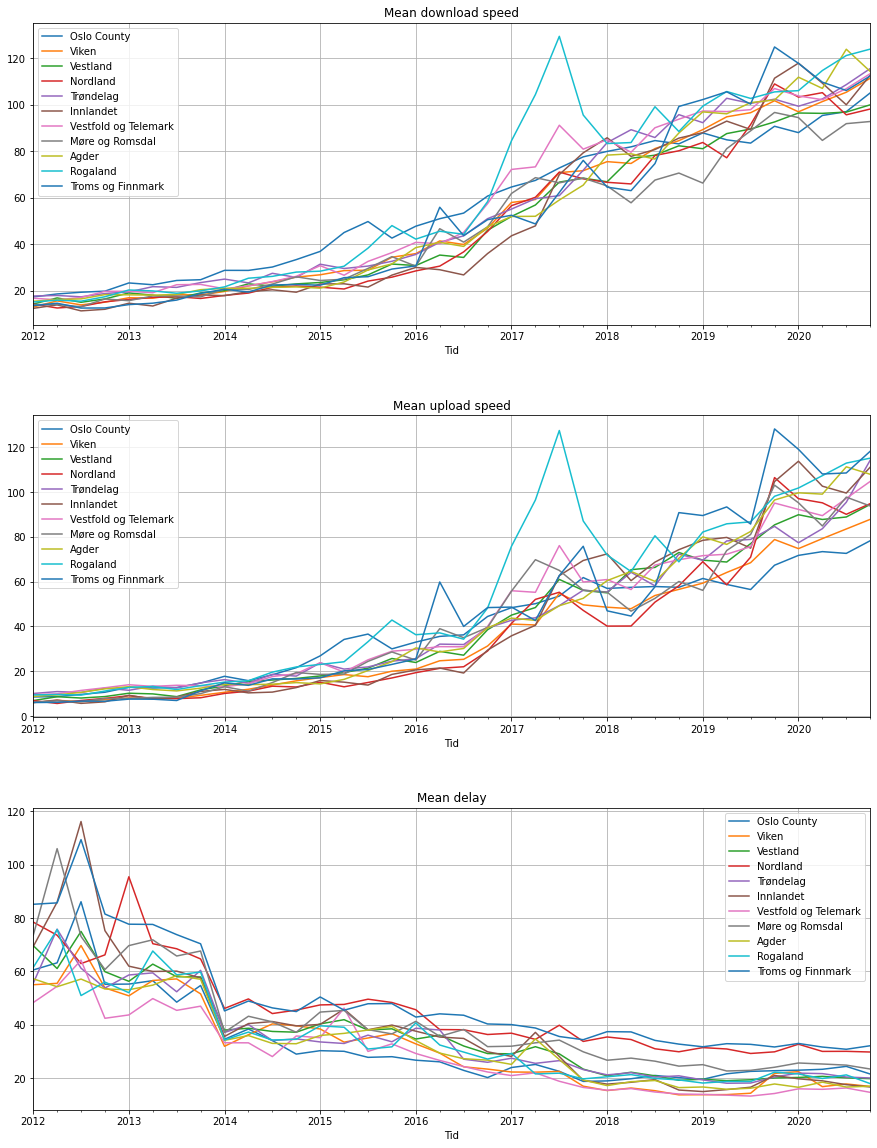

In [3]:
#mean plots
fig, axs = plt.subplots(nrows = 3, ncols=1, figsize= (15, 20))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
for i, c in enumerate(counties):
    df = dfs[c]
    df.mean_down.plot(ax = axs[0], label = c )
    df.mean_up.plot(ax = axs[1], label = c)
    df.mean_delay.plot(ax=axs[2], label = c)
axs[0].set_title("Mean download speed")
axs[0].legend(loc='upper left')
axs[0].grid()
axs[1].set_title("Mean upload speed")
axs[1].legend(loc='upper left')
axs[1].grid()
axs[2].set_title("Mean delay")
axs[2].legend(loc='upper right')
axs[2].grid()
fig.subplots_adjust(hspace=0.3)
plt.show()


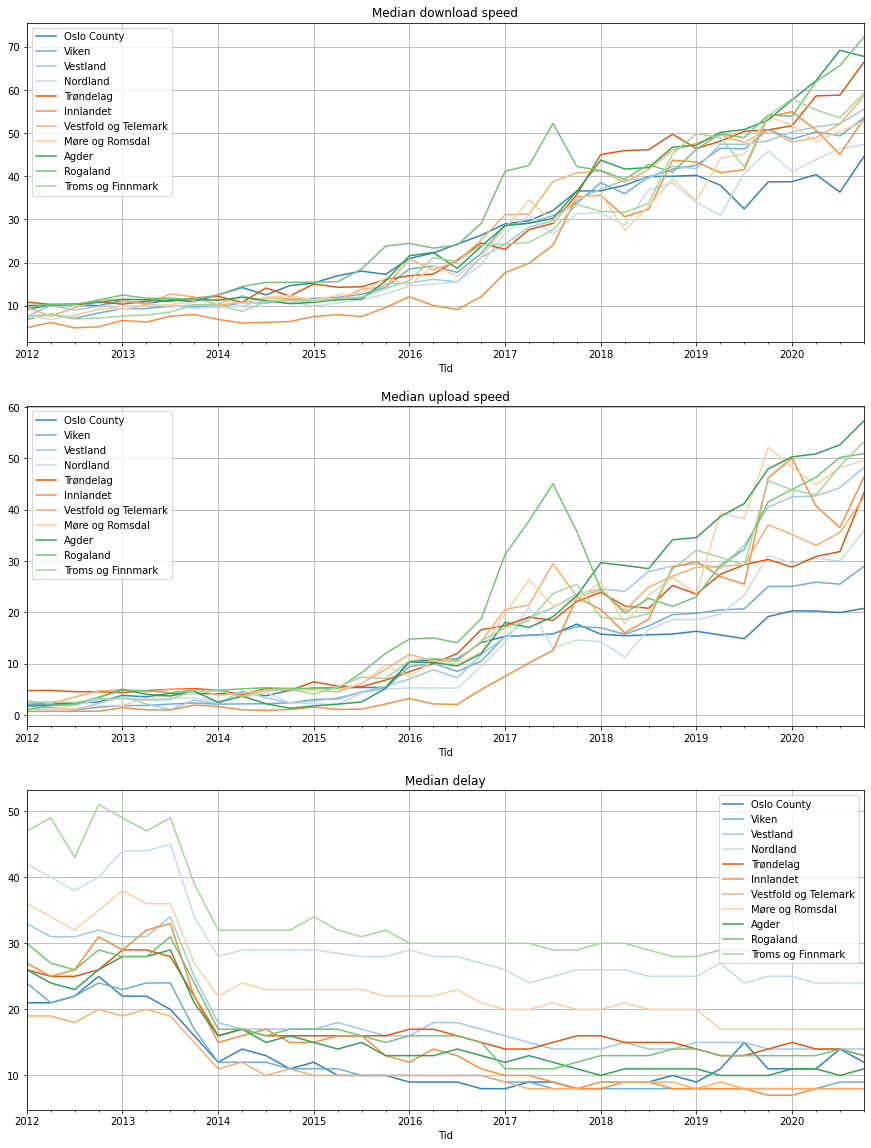

In [4]:
# median
fig, axs = plt.subplots(nrows = 3, ncols=1, figsize= (15, 20))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
for c in counties:
    df = dfs[c]
    df.median_down.plot(ax = axs[0], label = c)
    df.median_up.plot(ax = axs[1], label = c)
    df.median_delay.plot(ax=axs[2], label = c)
axs[0].set_title("Median download speed")
axs[0].legend(loc='upper left')
axs[0].grid()
axs[1].set_title("Median upload speed")
axs[1].legend(loc='upper left')
axs[1].grid()
axs[2].set_title("Median delay")
axs[2].legend(loc='best')
axs[2].grid()

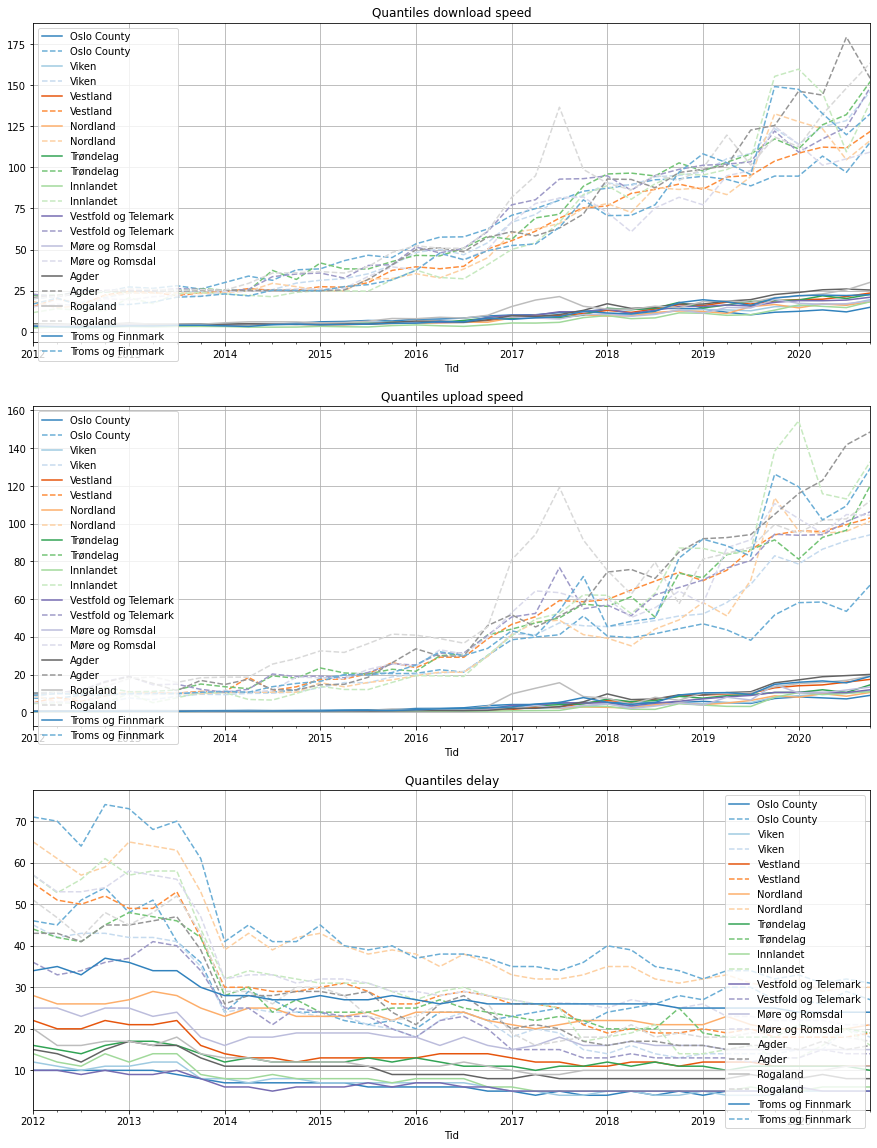

In [5]:
# skew
fig, axs = plt.subplots(nrows = 3, ncols=1, figsize= (15, 20))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
for c in counties:
    df = dfs[c]
    df['quant_down_0.25'].plot(ax = axs[0], label=c)
    df['quant_down_0.75'].plot(ax = axs[0], label=c ,style = '--')

    df['quant_up_0.25'].plot(ax = axs[1], label = c )
    df['quant_up_0.75'].plot(ax = axs[1], label = c, style = '--')
    
    df['quant_delay_0.25'].plot(ax = axs[2], label = c )
    df['quant_delay_0.75'].plot(ax = axs[2], label = c, style = '--')
axs[0].set_title("Quantiles download speed")
axs[0].legend(loc='upper left')
axs[0].grid()
axs[1].set_title("Quantiles upload speed")
axs[1].legend(loc='upper left')
axs[1].grid()
axs[2].set_title("Quantiles delay")
axs[2].legend(loc='best')
axs[2].grid()

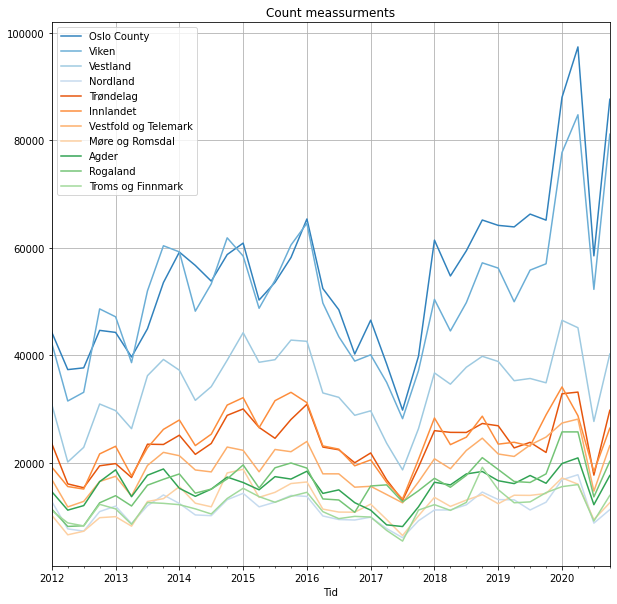

In [6]:
# number of meassurments
fig, axs = plt.subplots(nrows = 1, ncols=1, figsize= (10, 10))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
for c in counties:
    df = dfs[c]
    df['count'].plot(ax = axs, label = c)
axs.set_title("Count meassurments")
axs.legend(loc='upper left')
axs.grid()


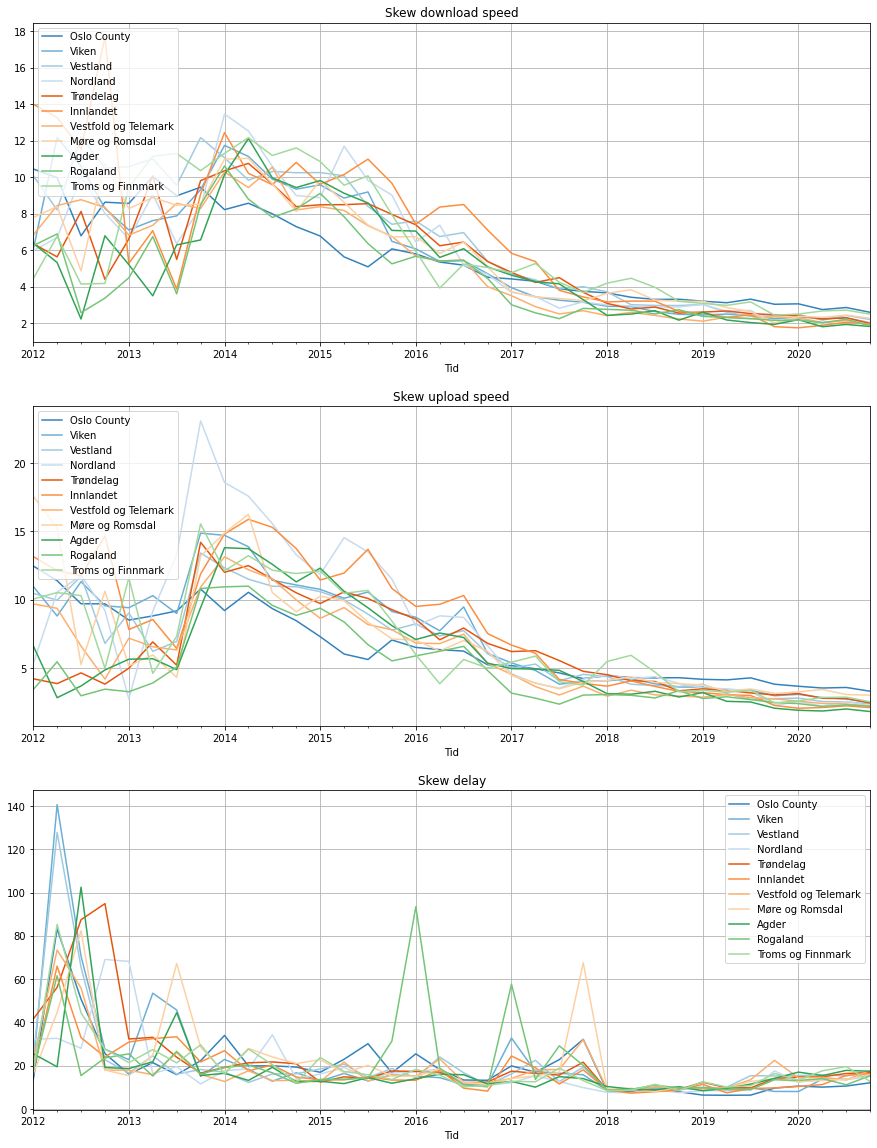

In [7]:
fig, axs = plt.subplots(nrows = 3, ncols=1, figsize= (15, 20))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab20c.colors)
for c in counties:
    df = dfs[c]
    
    df.skew_down.plot(ax = axs[0], label = c)
    df.skew_up.plot(ax = axs[1], label = c)
    df.skew_delay.plot(ax=axs[2], label = c)
axs[0].set_title("Skew download speed")
axs[0].legend(loc='upper left')
axs[0].grid()
axs[1].set_title("Skew upload speed")
axs[1].legend(loc='upper left')
axs[1].grid()
axs[2].set_title("Skew delay")
axs[2].legend(loc='best')
axs[2].grid()

## Merge to one Df

In [8]:
#add collumn for county
for c in counties:
    current = dfs[c]
    current['county'] = c


# concat all counties
full_df = pd.concat([dfs[c] for c in counties])
# add own collumn for year
full_df['year'] = full_df.index.year

#remove datetimeindex
full_df = full_df.reset_index(drop=True)

In [9]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396 entries, 0 to 395
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Tid               396 non-null    datetime64[ns]
 1   median_down       396 non-null    float64       
 2   median_up         396 non-null    float64       
 3   median_delay      396 non-null    float64       
 4   mean_down         396 non-null    float64       
 5   mean_up           396 non-null    float64       
 6   mean_delay        396 non-null    float64       
 7   skew_down         396 non-null    float64       
 8   skew_up           396 non-null    float64       
 9   skew_delay        396 non-null    float64       
 10  quant_down_0.25   396 non-null    float64       
 11  quant_down_0.75   396 non-null    float64       
 12  quant_up_0.25     396 non-null    float64       
 13  quant_up_0.75     396 non-null    float64       
 14  quant_delay_0.25  396 non-

<AxesSubplot:xlabel='Tid', ylabel='count'>

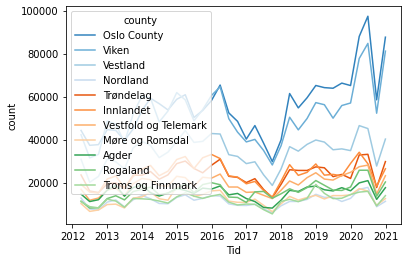

In [10]:
sns.lineplot(data=full_df, x='Tid', y='count', hue='county')

## Comparison plot of all Counties

[15340. 16071. 16801. 17532. 18262.]


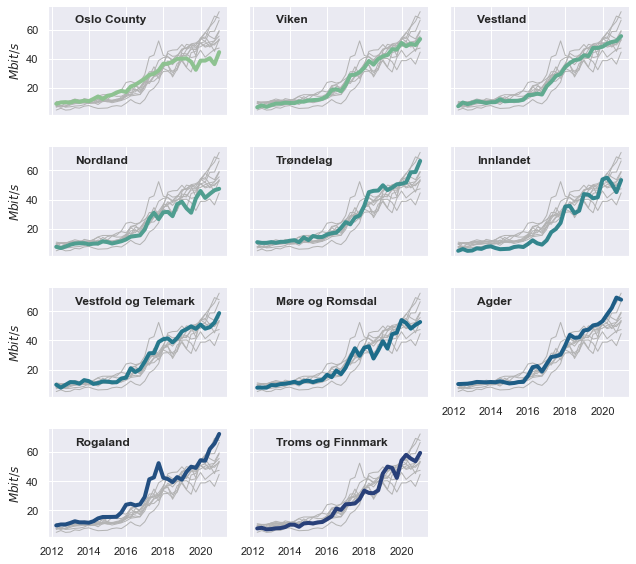

In [11]:
import matplotlib.dates as mdates
# Plot each counties's time series in its own facet
sns.set_theme(style="darkgrid")

g = sns.relplot(
    data=full_df,
    x="Tid", y="median_down", col="county", hue="county",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for county, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.15, .85, county, transform=ax.transAxes, fontweight="bold")

    # Plot every counties time series in the background
    sns.lineplot(
        data=full_df, x="Tid", y="median_down", units="county",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticks(ax.get_xticks()[1:-1:2])

print(ax.get_xticks())
# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "$Mbit/s$")
g.tight_layout()
#plt.savefig("figs/reg_download")

[15340. 16071. 16801. 17532. 18262.]


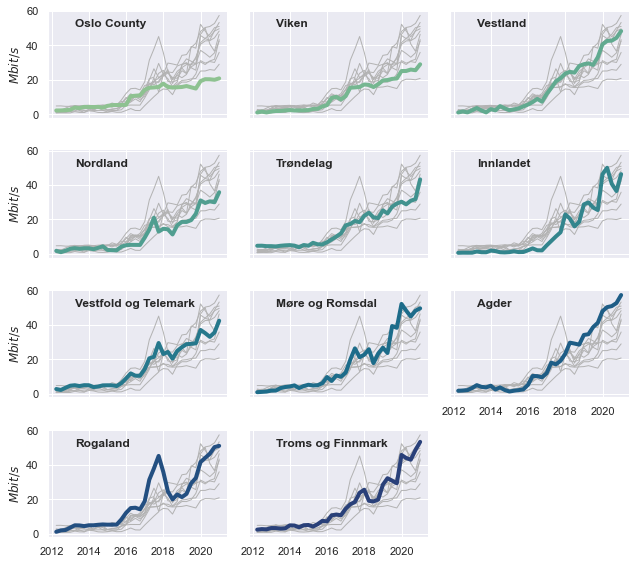

In [12]:
g = sns.relplot(
    data=full_df,
    x="Tid", y="median_up", col="county", hue="county",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for county, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.15, .85, county, transform=ax.transAxes, fontweight="bold")

    # Plot every counties time series in the background
    sns.lineplot(
        data=full_df, x="Tid", y="median_up", units="county",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticks(ax.get_xticks()[1:-1:2])

print(ax.get_xticks())
# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "$Mbit/s$")
g.tight_layout()
#plt.savefig("figs/reg_upload")

[16436. 17167. 17897.]


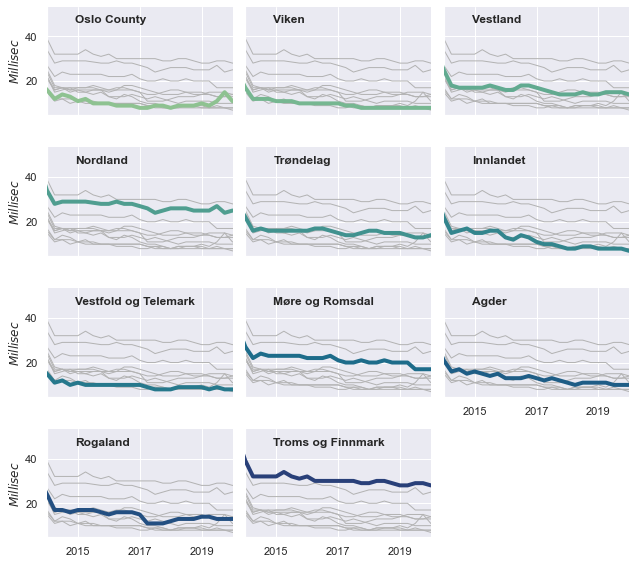

In [13]:

g = sns.relplot(
    data=full_df,
    x="Tid", y="median_delay", col="county", hue="county",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for county, ax in g.axes_dict.items():
    ax.set_xlim(np.datetime64('2014'),np.datetime64('2020'))

    # Add the title as an annotation within the plot
    ax.text(.15, .85, county, transform=ax.transAxes, fontweight="bold")

    # Plot every counties time series in the background
    sns.lineplot(
        data=full_df, x="Tid", y="median_delay", units="county",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticks(ax.get_xticks()[1:-1:2])

print(ax.get_xticks())
# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "$Millisec$")
g.tight_layout()
#plt.savefig("figs/reg_latency")

In [29]:
full_df.head()

,Tid,median_down,median_up,median_delay,mean_down,mean_up,mean_delay,skew_down,skew_up,skew_delay,quant_down_0.25,quant_down_0.75,quant_up_0.25,quant_up_0.75,quant_delay_0.25,quant_delay_0.75,count,county,year
0,2012-03-31,9.2105,2.1400,21.0,17.347559,8.510649,60.571570,10.450510,12.480337,13.300770,3.18300,20.08325,0.727,7.46550,10.0,46.0,44292,Oslo County,2012
1,2012-06-30,10.1450,2.1560,21.0,18.633142,8.653398,63.239132,9.974755,11.401171,83.229865,3.71200,21.50350,0.818,7.48150,10.0,45.0,37356,Oslo County,2012
2,2012-09-30,10.3440,2.3050,22.0,19.366539,9.650416,86.156300,6.792698,9.716707,50.775482,3.63975,25.04500,0.853,9.01125,10.0,51.0,37684,Oslo County,2012
3,2012-12-31,10.0200,2.5430,25.0,19.845585,10.610839,55.187903,8.633397,9.710724,25.651141,3.91500,24.22850,0.879,8.98050,10.0,54.0,44656,Oslo County,2012
4,2013-03-31,11.1895,3.8285,22.0,23.364182,12.860434,55.277406,8.565950,8.525938,16.152584,4.29725,27.19550,0.939,10.15500,10.0,48.0,44278,Oslo County,2013


## Difference in increase between counties.


### Download

In [14]:

def compute_lastQ_change(column, years=list(range(2012, 2020+1))):
    last_df = pd.DataFrame()
    for c in counties:
        #get last quarter of each year for county c
        last_q = full_df[full_df.county == c].groupby(full_df.Tid.dt.year).last()
        last_q = last_q[last_q.index.isin(years)]
        
        last_q[column] = np.round(last_q[column], 1) 
        # compute the percentage change since same period last year
        last_q['pct_increase_' + column.split('_')[1] ] = np.round(last_q[column].pct_change()*100)
        
        # add a collumn for the county
        last_q['county'] = c
        
        #add county measurements to complete dataframe
        last_df= last_df.append(last_q[[column, 'pct_increase_' + column.split('_')[1], 'county']])
    return last_df.reset_index()

In [15]:
# creating output tables
median_down_last = compute_lastQ_change('median_down', years=[2012,2020]).set_index(['county', 'Tid'])
median_up_last =compute_lastQ_change('median_up', years=[2012,2020]).set_index(['county', 'Tid'])
median_lat_last =compute_lastQ_change('median_delay', years=[2014,2020]).set_index(['county', 'Tid'])


speed_table = pd.concat([median_down_last, median_up_last], axis =1)
speed_table

median_down  pct_increase_down  median_up  \
county               Tid                                               
Oslo County          2012         10.0                NaN        2.5   
                     2020         44.6              346.0       20.8   
Viken                2012          8.3                NaN        1.5   
                     2020         53.5              545.0       28.9   
Vestland             2012          9.9                NaN        2.3   
                     2020         55.5              461.0       48.2   
Nordland             2012          9.1                NaN        3.0   
                     2020         47.3              420.0       35.8   
Trøndelag            2012         10.9                NaN        4.5   
                     2020         66.4              509.0       43.3   
Innlandet            2012          5.1                NaN        0.7   
                     2020         53.3              945.0       46.3   
Vestfold og Telemark 2012         11.4                NaN        4.7   
                     2020         58.6              414.0       42.4   
Møre og Romsdal      2012          9.4                NaN        1.8   
                     2020         52.5              459.0       49.6   
Agder                2012         10.8                NaN        3.4   
                     2020         67.8              528.0       57.3   
Rogaland             2012         11.3                NaN        3.5   
                     2020         72.2              539.0       50.9   
Troms og Finnmark    2012          7.2                NaN        3.2   
                     2020         59.3              724.0       53.2   

                           pct_increase_up  
county               Tid                    
Oslo County          2012              NaN  
                     2020            732.0  
Viken                2012              NaN  
                     2020           1827.0  
Vestland             2012              NaN  
                     2020           1996.0  
Nordland             2012              NaN  
                     2020           1093.0  
Trøndelag            2012              NaN  
                     2020            862.0  
Innlandet            2012              NaN  
                     2020           6514.0  
Vestfold og Telemark 2012              NaN  
                     2020            802.0  
Møre og Romsdal      2012              NaN  
                     2020           2656.0  
Agder                2012              NaN  
                     2020           1585.0  
Rogaland             2012              NaN  
                     2020           1354.0  
Troms og Finnmark    2012              NaN  
                     2020           1562.0

In [16]:
#print(speed_table.to_latex(multirow=True,bold_rows=True, caption = 'Increase in regional upload and download speed'))

In [17]:
median_lat_last

median_delay  pct_increase_delay
county               Tid                                   
Oslo County          2014          11.0                 NaN
                     2020          12.0                 9.0
Viken                2014          11.0                 NaN
                     2020           9.0               -18.0
Vestland             2014          17.0                 NaN
                     2020          14.0               -18.0
Nordland             2014          29.0                 NaN
                     2020          24.0               -17.0
Trøndelag            2014          16.0                 NaN
                     2020          13.0               -19.0
Innlandet            2014          15.0                 NaN
                     2020           8.0               -47.0
Vestfold og Telemark 2014          11.0                 NaN
                     2020           8.0               -27.0
Møre og Romsdal      2014          23.0                 NaN
                     2020          17.0               -26.0
Agder                2014          16.0                 NaN
                     2020          11.0               -31.0
Rogaland             2014          17.0                 NaN
                     2020          13.0               -24.0
Troms og Finnmark    2014          32.0                 NaN
                     2020          27.0               -16.0

In [18]:
#print(median_lat_last.to_latex(multirow=True,bold_rows=True, caption = 'Development in regional latency'))

### Upload

In [20]:
med_up_last = compute_lastQ_change('median_up')
med_up_last.tail()

,Tid,median_up,pct_increase_up,county
94,2016,14.4,103.0,Troms og Finnmark
95,2017,25.5,77.0,Troms og Finnmark
96,2018,28.4,11.0,Troms og Finnmark
97,2019,45.6,61.0,Troms og Finnmark
98,2020,53.2,17.0,Troms og Finnmark


### Latency

In [22]:
median_lat_last = compute_lastQ_change('median_delay')

median_lat_last.head()

,Tid,median_delay,pct_increase_delay,county
0,2012,25.0,NaN,Oslo County
1,2013,16.0,-36.0,Oslo County
2,2014,11.0,-31.0,Oslo County
3,2015,10.0,-9.0,Oslo County
4,2016,8.0,-20.0,Oslo County


## Daily aggr import: look for spike in Rogaland

In [24]:
file_path = '../datasets/county-aggregated/' + 'Rogaland' + '_day_aggr.csv' 
rdf = pd.read_csv(file_path)
rdf.Tid = pd.to_datetime(rdf.Tid)
rdf.index= rdf.Tid
rdf.drop("Tid", inplace=True, axis=1)
rdf.rename(columns = {"('quantile_down', 0.75)": "quant_down_0.75", 
                         "('quantile_down', 0.25)": "quant_down_0.25", 
                         "('quantile_up', 0.75)": "quant_up_0.75",
                         "('quantile_up', 0.25)": "quant_up_0.25",
                         "('quantile_delay', 0.75)": "quant_delay_0.75",
                         "('quantile_delay', 0.25)": "quant_delay_0.25"}, inplace =True)
rdf

,median_down,median_up,median_delay,mean_down,mean_up,mean_delay,std_down,std_up,std_delay,quant_down_0.25,quant_down_0.75,quant_up_0.25,quant_up_0.75,quant_delay_0.25,quant_delay_0.75,count
Tid,,,,,,,,,,,,,,,,
2012-01-01,7202.0,867.0,33.0,11179.317365,6218.353293,49.946108,12360.075834,14308.924575,59.212936,3319.00,14197.00,604.50,4462.50,22.5,53.50,167
2012-01-02,10220.0,1622.0,30.0,18766.611940,10381.646766,54.636816,24179.368813,16552.770366,93.463482,3878.00,24643.00,541.00,17343.00,16.0,51.00,201
2012-01-03,8962.5,1016.5,28.0,16395.106742,8668.955056,55.438202,21742.600265,16296.547457,116.911136,3540.50,20150.00,537.00,5098.75,20.0,49.75,178
2012-01-04,10113.0,1017.0,31.0,14423.167742,11006.593548,50.632258,14749.408868,20850.278138,110.183968,3656.50,20917.50,601.00,8629.50,18.0,49.50,155
2012-01-05,8149.0,1003.0,32.0,11514.231214,6430.260116,44.034682,11950.020319,11418.930472,52.269972,4117.00,12396.00,580.00,5126.00,20.0,49.00,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,64269.5,51587.5,13.0,108828.328125,95643.114583,17.729167,123856.739882,126280.831238,15.716386,30318.50,144238.75,19096.75,94116.50,11.0,17.00,192
2020-12-28,72944.0,57788.0,13.0,133464.066246,138820.182965,14.971609,137176.195034,164789.163924,7.765296,36314.00,201117.00,20598.00,206079.00,11.0,16.00,317
2020-12-29,74808.0,52049.0,14.0,121687.222857,101141.937143,16.720000,129366.840101,129012.551517,10.082784,37063.00,160932.50,20605.00,123454.00,12.0,19.00,175


<AxesSubplot:xlabel='Tid'>

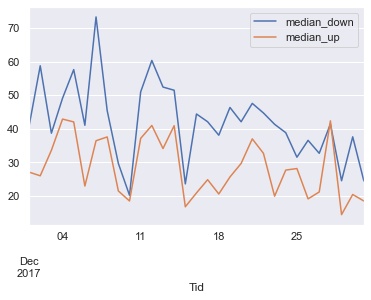

In [25]:
(rdf[['median_down', 'median_up']].loc['2017-12']/1000).plot()

<AxesSubplot:xlabel='Tid'>

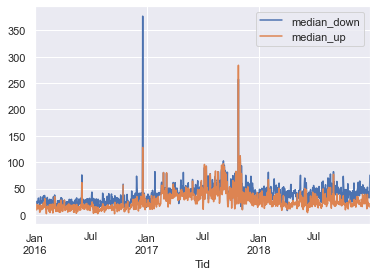

In [28]:
(rdf[['median_down', 'median_up']].loc['2016':'2018']/1000).plot()

## Looking at dispertion (IQR)

In [31]:
full_df.tail()

,Tid,median_down,median_up,median_delay,mean_down,mean_up,mean_delay,skew_down,skew_up,skew_delay,quant_down_0.25,quant_down_0.75,quant_up_0.25,quant_up_0.75,quant_delay_0.25,quant_delay_0.75,count,county,year
391,2019-12-31,54.0860,45.6390,28.0,124.825479,128.228358,31.691893,2.449648,2.473442,16.415122,20.37100,149.31600,14.84900,126.23600,25.0,32.0,14469,Troms og Finnmark,2019
392,2020-03-31,57.9550,43.8440,28.0,117.781374,119.108752,33.012257,2.512148,2.619900,13.367703,21.88350,147.62200,15.94800,119.55450,24.0,33.0,15583,Troms og Finnmark,2020
393,2020-06-30,55.3745,42.8685,27.0,109.688761,108.097532,31.663201,2.680777,2.875993,17.640809,22.18725,132.84350,16.65200,101.99100,24.0,31.0,15968,Troms og Finnmark,2020
394,2020-09-30,53.5775,48.4770,27.0,106.112394,108.559119,30.829959,2.728419,2.894246,19.609760,21.96300,119.95625,15.62800,109.41775,24.0,32.0,9186,Troms og Finnmark,2020
395,2020-12-31,59.2730,53.2180,27.0,112.356363,118.260965,32.154056,2.505877,2.557111,12.698042,22.50550,132.74675,19.06475,129.44325,24.0,31.0,13956,Troms og Finnmark,2020


In [33]:
full_df['iqr_down'] = full_df['quant_down_0.75']-full_df['quant_down_0.25']
full_df['iqr_up'] = full_df['quant_up_0.75']-full_df['quant_up_0.25']
full_df['iqr_latency'] = full_df['quant_delay_0.75']-full_df['quant_delay_0.25']

[16436. 17167. 17897.]


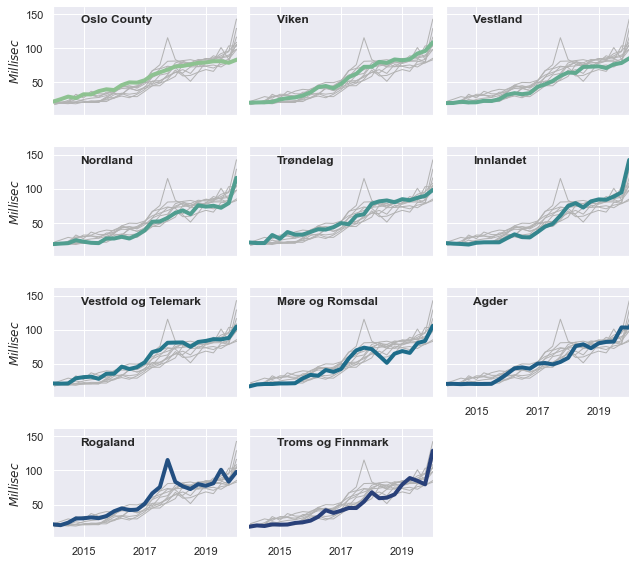

In [35]:

g = sns.relplot(
    data=full_df,
    x="Tid", y="iqr_down", col="county", hue="county",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for county, ax in g.axes_dict.items():
    ax.set_xlim(np.datetime64('2014'),np.datetime64('2020'))

    # Add the title as an annotation within the plot
    ax.text(.15, .85, county, transform=ax.transAxes, fontweight="bold")

    # Plot every counties time series in the background
    sns.lineplot(
        data=full_df, x="Tid", y="iqr_down", units="county",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticks(ax.get_xticks()[1:-1:2])

print(ax.get_xticks())
# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "$Millisec$")
g.tight_layout()


[16436. 17167. 17897.]


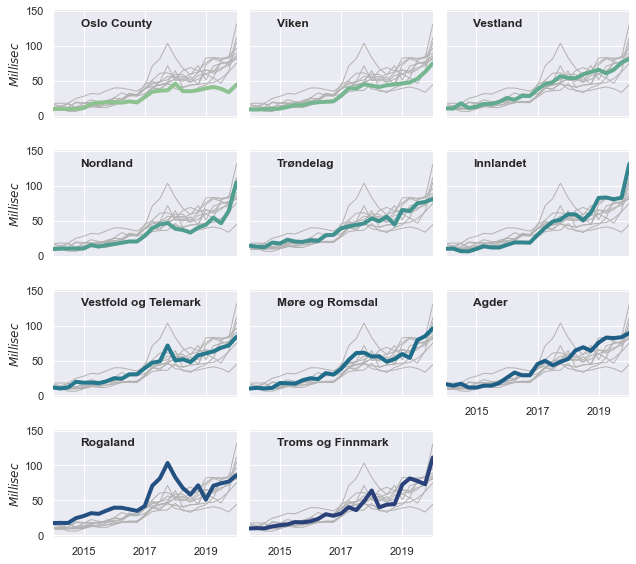

In [36]:
g = sns.relplot(
    data=full_df,
    x="Tid", y="iqr_up", col="county", hue="county",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=3, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for county, ax in g.axes_dict.items():
    ax.set_xlim(np.datetime64('2014'),np.datetime64('2020'))

    # Add the title as an annotation within the plot
    ax.text(.15, .85, county, transform=ax.transAxes, fontweight="bold")

    # Plot every counties time series in the background
    sns.lineplot(
        data=full_df, x="Tid", y="iqr_up", units="county",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticks(ax.get_xticks()[1:-1:2])

print(ax.get_xticks())
# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "$Millisec$")
g.tight_layout()


[16436. 17167. 17897.]


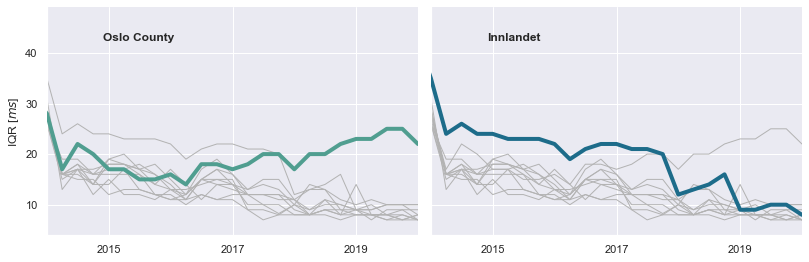

In [48]:
g = sns.relplot(
    data=full_df[full_df.county.isin(['Oslo County', 'Innlandet'])],
    x="Tid", y="iqr_latency", col="county", hue="county",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=2, height=3.8, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for county, ax in g.axes_dict.items():
    ax.set_xlim(np.datetime64('2014'),np.datetime64('2020'))

    # Add the title as an annotation within the plot
    ax.text(.15, .85, county, transform=ax.transAxes, fontweight="bold")

    # Plot every counties time series in the background
    sns.lineplot(
        data=full_df, x="Tid", y="iqr_latency", units="county",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
ax.set_xticks(ax.get_xticks()[1:-1:2])

print(ax.get_xticks())
# Tweak the supporting aspects of the plot
g.set_titles("")
g.set_axis_labels("", "IQR [$ms$]")
g.tight_layout()
plt.savefig("figs/dispertion_lat")